#  Predicting Student Performance based on factors like Study hours, Attendance, and Grades

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Simulate a dataset

In [2]:

data = {
    'study_hours': [10, 15, 7, 20, 6, 12, 18, 25, 5, 14, 16, 8, 9, 21, 17],
    'attendance': [85, 90, 75, 95, 70, 88, 93, 98, 65, 92, 90, 80, 78, 94, 89],
    'previous_grade': [70, 80, 65, 85, 60, 75, 82, 90, 55, 78, 83, 68, 72, 87, 80],
    'pass': [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]  # 1 = Pass, 0 = Fail
}

# Convert to DataFrame

In [3]:

df = pd.DataFrame(data)

# Explore the dataset

In [4]:

print(df.head())

   study_hours  attendance  previous_grade  pass
0           10          85              70     1
1           15          90              80     1
2            7          75              65     0
3           20          95              85     1
4            6          70              60     0


# Split the data into features and labels

In [5]:

X = df[['study_hours', 'attendance', 'previous_grade']]
y = df['pass']


# Split the dataset into training and test sets

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features

In [7]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train a Logistic Regression model

In [8]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Make predictions

In [9]:

y_pred = model.predict(X_test)

# Evaluate the model

In [10]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 80.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



# Evaluate Confusion Matrix

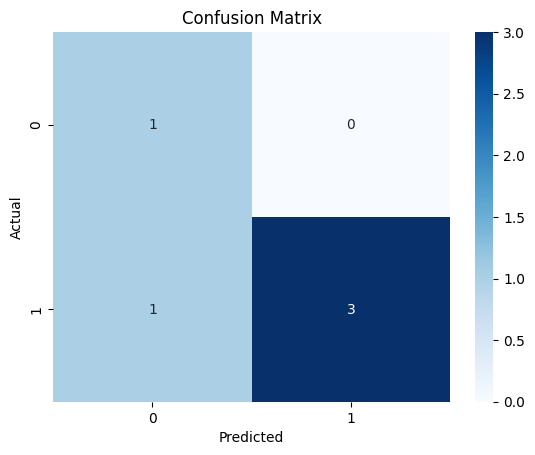

In [11]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict performance for a new student

In [12]:

new_student = np.array([[15, 85, 75]])  # 15 hours of study, 85% attendance, 75 previous grade
new_student_scaled = scaler.transform(new_student)
prediction = model.predict(new_student_scaled)
result = 'Pass' if prediction[0] == 1 else 'Fail'
print(f"Prediction for new student: {result}")


Prediction for new student: Pass


C:\Users\welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
